# Apprentissage Supervisé avec Sklearn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Régression

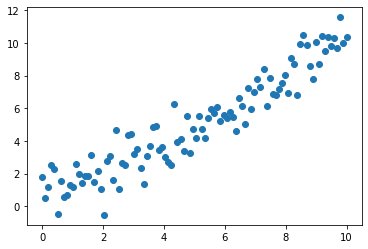

In [5]:
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X + np.random.randn(m, 1)

plt.scatter(X, y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression() #on parle d'estimateur et on précise alors ses hyperparamètres
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

0.8881140743377214

In [8]:
predictions=model.predict(X)

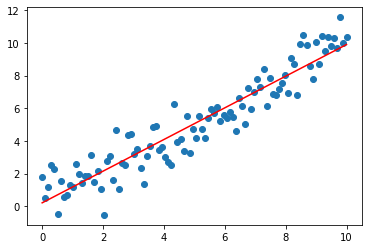

In [9]:
plt.scatter(X, y)
plt.plot(X,predictions,c='r')

In [10]:
model.get_params(True)
model.set_params()

LinearRegression()

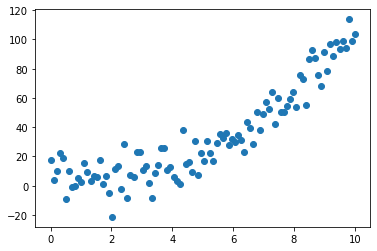

In [11]:
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X**2 + 10*np.random.randn(m,1)

plt.scatter(X, y)

In [12]:
model = LinearRegression() #on parle d'estimateur et on précise alors ses hyperparamètres
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

0.7855276854537206

In [13]:
predictions=model.predict(X)

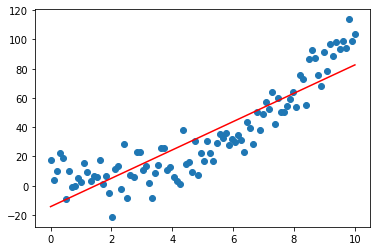

In [14]:
plt.scatter(X, y)
plt.plot(X,predictions,c='r')

In [15]:
 from sklearn.svm import SVR #modèle de Support Vector Machine
 model2=SVR(C=100)
 model2.fit(X,y)
 model2.score(X,y)

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.916152384089585

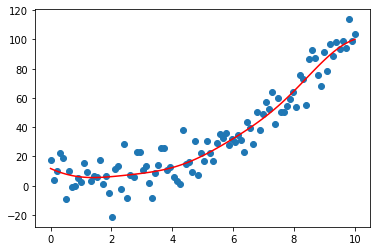

In [16]:
plt.scatter(X, y)
plt.plot(X, model2.predict(X), c='red')

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
mean_squared_error(X,model2.predict(X),squared=False)

40.040678279211996

In [19]:
mean_absolute_error(X,model2.predict(X))

28.91899820058291

## 2. Classification

In [21]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [22]:
from sklearn.neighbors import KNeighborsClassifier #K plus proche voisin

In [23]:
model3 = KNeighborsClassifier(n_neighbors=5) 
#essayez avec d'autres valeur de n_neighbors qui est un hyperparamètre

In [24]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [25]:
model3.fit(X, y) # entrainement du modele
model3.score(X, y) # évaluation

0.8319327731092437

## 3. Prediction de survie

In [26]:
def survie(model, pclass=1, sex=1, age=23):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))
  print(model.predict_proba(x)) #cette fonction n'existe pas pour tout les estimateurs attention

In [25]:
survie(model3)

[1]
[[0. 1.]]


In [27]:
from sklearn.metrics import confusion_matrix

In [31]:
print(confusion_matrix(y,model3.predict(X)))

[[375  49]
 [ 71 219]]


In [32]:
(375+219)/(375+49+71+219)

0.8319327731092437

## 4. Exercice
Écrire un code qui permet de trouver la meilleure valeur de voisin n_neighbors pour le modele de KNeighborsClassifier.

Dans sklearn, il est possible de faire cela avec la classe GridSearchCV. Mais il peut également etre utile de savoir écrire soi-meme ce genre de code de recherche.

2


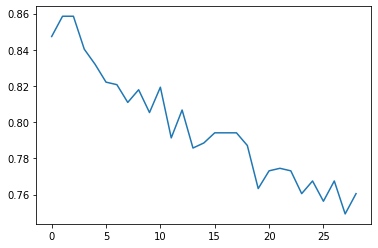

In [ ]:
# SOLUTION
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    score.append(model.score(X, y))
    
    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)

print(best_k)
plt.plot(score)